In [2]:
!pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 3.7/376.0 MB 21.8 MB/s eta 0:00:18
    --------------------------------------- 8.7/376.0 MB 21.5 MB/s eta 0:00:18
   - -------------------------------------- 13.1/376.0 MB 21.7 MB/s eta 0:00:17
   - -------------------------------------- 18.1/376.0 MB 22.4 MB/s eta 0:00:17
   -- ------------------------------------- 23.6/376.0 MB 23.0 MB/s eta 0:00:16
   --- ------------------------------------ 29.1/376.0 MB 23.7 MB/s eta 0:00:15
   --- ------------------------------------ 34.1/376.0 MB 23.8 MB/s eta 0:00:15
   ---- ----------------------------------- 39.8/376.0 MB 24.1 MB/s eta 0:00:14
   ---- ----------------------------------- 44.6/376.0 MB 24.0 MB/s eta 0:00:14
   ----- ---------------------------------- 49.8/376.0 MB 24.2 MB/s eta 0:00:14
   ----- ---------------------------------- 55.3/376.0 MB 24.5 MB/s eta 0:00:14
   ------ --------------------------------- 61.1/37

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, classification_report
from sklearn import datasets

In [7]:
digits = datasets.load_digits()
X = digits.images  # 8x8 grayscale images
y = digits.target  # Labels (0 to 9)

In [8]:
print("Dataset Shape:", X.shape)  # (1797, 8, 8)
print("Unique Labels:", np.unique(y))  # Labels: 0 to 9
print("\nSample Data:\n", X[:5])  # Print first 5 images as arrays
print("\nSample Labels:\n", y[:5])  # Print first 5 labels

Dataset Shape: (1797, 8, 8)
Unique Labels: [0 1 2 3 4 5 6 7 8 9]

Sample Data:
 [[[ 0.  0.  5. 13.  9.  1.  0.  0.]
  [ 0.  0. 13. 15. 10. 15.  5.  0.]
  [ 0.  3. 15.  2.  0. 11.  8.  0.]
  [ 0.  4. 12.  0.  0.  8.  8.  0.]
  [ 0.  5.  8.  0.  0.  9.  8.  0.]
  [ 0.  4. 11.  0.  1. 12.  7.  0.]
  [ 0.  2. 14.  5. 10. 12.  0.  0.]
  [ 0.  0.  6. 13. 10.  0.  0.  0.]]

 [[ 0.  0.  0. 12. 13.  5.  0.  0.]
  [ 0.  0.  0. 11. 16.  9.  0.  0.]
  [ 0.  0.  3. 15. 16.  6.  0.  0.]
  [ 0.  7. 15. 16. 16.  2.  0.  0.]
  [ 0.  0.  1. 16. 16.  3.  0.  0.]
  [ 0.  0.  1. 16. 16.  6.  0.  0.]
  [ 0.  0.  1. 16. 16.  6.  0.  0.]
  [ 0.  0.  0. 11. 16. 10.  0.  0.]]

 [[ 0.  0.  0.  4. 15. 12.  0.  0.]
  [ 0.  0.  3. 16. 15. 14.  0.  0.]
  [ 0.  0.  8. 13.  8. 16.  0.  0.]
  [ 0.  0.  1.  6. 15. 11.  0.  0.]
  [ 0.  1.  8. 13. 15.  1.  0.  0.]
  [ 0.  9. 16. 16.  5.  0.  0.  0.]
  [ 0.  3. 13. 16. 16. 11.  5.  0.]
  [ 0.  0.  0.  3. 11. 16.  9.  0.]]

 [[ 0.  0.  7. 15. 13.  1.  0.  0.]
  [ 0.  8. 13.

In [9]:
print("Dataset Shape:", digits.images.shape)  # (1797, 8, 8)
print("Number of Labels:", len(np.unique(digits.target)))  # 10 (0-9)

Dataset Shape: (1797, 8, 8)
Number of Labels: 10


In [10]:
# Step 3: Normalize Pixel Values
X = X / 16.0  # Normalize pixels (originally between 0-16)

# Step 4: Reshape Images for CNN
X = X.reshape(-1, 8, 8, 1)  # CNNs require (samples, height, width, channels)

# Step 5: Split into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

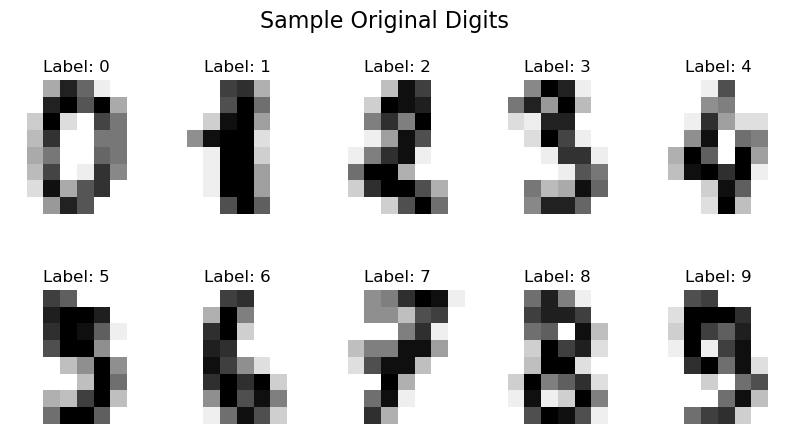

In [11]:
# Step 6: Convert Labels to One-Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Step 7: Visualize Original Digits
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.suptitle("Sample Original Digits", fontsize=16)
plt.show()

In [12]:
# Step 8: Define the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(8,8,1)),  # Conv Layer
    layers.MaxPooling2D((2,2)),  # Max Pooling
    layers.Flatten(),  # Flatten for Fully Connected Layer
    layers.Dense(64, activation='relu'),  # Dense Layer
    layers.Dense(10, activation='softmax')  # Output Layer (10 Classes)
])

C:\Users\veena madhuri\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Step 9: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 10: Train the Model
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), verbose=1)

Epoch 1/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3066 - loss: 2.2095 - val_accuracy: 0.5917 - val_loss: 1.8157
Epoch 2/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7602 - loss: 1.5975 - val_accuracy: 0.8556 - val_loss: 0.9582
Epoch 3/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8823 - loss: 0.7986 - val_accuracy: 0.9083 - val_loss: 0.4779
Epoch 4/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9190 - loss: 0.4256 - val_accuracy: 0.9278 - val_loss: 0.3288
Epoch 5/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9328 - loss: 0.3286 - val_accuracy: 0.9361 - val_loss: 0.2470
Epoch 6/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9471 - loss: 0.2463 - val_accuracy: 0.9528 - val_loss: 0.1923
Epoch 7/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9421 - loss: 0.2165 - val_accuracy: 0.9500 - val_loss: 0.1724
Epoch 8/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9571 - loss: 0.1727 - val_accuracy: 0.9639 - val_loss

In [15]:
# Step 11: Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# Step 12: Make Predictions
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9690 - loss: 0.0966 
Test Accuracy: 96.94%
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
